(-5.0, 5.0, -5.0, 5.0)

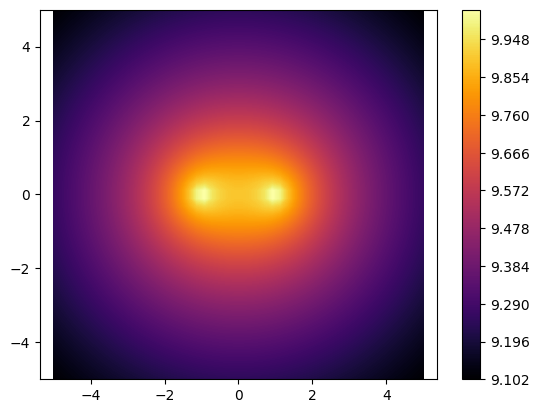

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0

def epotlist(r,Q,R):
    V=0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)**2
        V += qi/(4*np.pi*epsilon_0*Rinorm)
    return V
    
def findpot(N, L, Q_l, z_l):
    Q = []
    R1 = []
    R2 = []
    R3 = []
    R4 = []
    a = L/2
    rho_l = Q_l/N
    lp = np.linspace(-a, a, N)
    z = 0
    for i in range(N):
        R1.append(np.array([lp[i], a, z_l]))
        R2.append(np.array([lp[i], -a, z_l]))
        R3.append(np.array([a, lp[i], z_l]))
        R4.append(np.array([-a, lp[i], z_l]))
        Q.append(rho_l)
    Lx = 5
    Ly = 5
    Lz = 5
    x = np.linspace(-Lx,Lx,N)
    y = np.linspace(-Ly,Ly,N)
    z = np.linspace(-Lz,Lz,N)
    rx = np.meshgrid(x,x)[0]
    ry, rz = np.meshgrid(y,z)
    V = np.zeros((N,N),float)
    for i in range(len(ry.flat)):
        r = np.array([z_l , ry.flat[i], rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R1) + epotlist(r,Q,R2) + epotlist(r,Q,R3) + epotlist(r,Q,R4)
    return rx, ry, rz, Q, V
    
Q_l = 1
a = 1
N = 50
L = 2*a
z = 0
rx, ry, rz, Q, V = findpot(N, L, Q_l, z)
Q_tot = sum(Q) * 4

plt.contourf(ry,rz,np.log10(V), levels = 500, cmap = "inferno")
plt.colorbar()
plt.axis("equal")